In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import skimage.io as sio
from skimage.metrics import peak_signal_noise_ratio
from skimage import img_as_float
%matplotlib inline

(474, 713, 3)


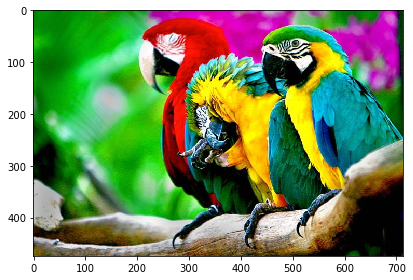

In [2]:
img_def = sio.imread('parrots.jpg')
sio.imshow(img_def)
print(img_def.shape)

(474, 713, 3)
[0.01568627 0.49411765 0.01960784]


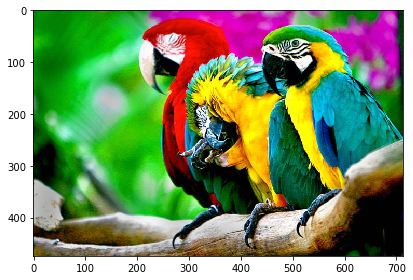

In [3]:
img = img_as_float(img_def)
sio.imshow(img)
print(img.shape)
print(img[0,0,:])

In [4]:
# Формируем матрицу объекты-признаки
# Каждый пиксель -- три числа
data = np.reshape(img, [474*713, 3])
print(data.shape)

(337962, 3)


In [5]:
#Кластеризуем
kmeans = KMeans(init='k-means++', random_state=241)
kmeans.fit(data)
predicts = kmeans.predict(data)

In [6]:
# Кластеры
clusters = np.unique(predicts)
print(clusters)

[0 1 2 3 4 5 6 7]


In [8]:
# Заменяем в каждом кластере медианой
data_median = np.copy(data)
for n_cluster in clusters:
    curr_index = np.arange(0,data.shape[0])[predicts == n_cluster]
    data_median[curr_index,0] = np.median(data[curr_index][:,0])
    data_median[curr_index,1] = np.median(data[curr_index,1])
    data_median[curr_index,2] = np.median(data[curr_index,2])
# Заменяем в каждом кластере средним
data_mean = np.copy(data)
for n_cluster in clusters:
    curr_index = np.arange(0,data.shape[0])[predicts == n_cluster]
    data_mean[curr_index,0] = np.mean(data[curr_index][:,0])
    data_mean[curr_index,1] = np.mean(data[curr_index,1])
    data_mean[curr_index,2] = np.mean(data[curr_index,2])

(474, 713, 3)


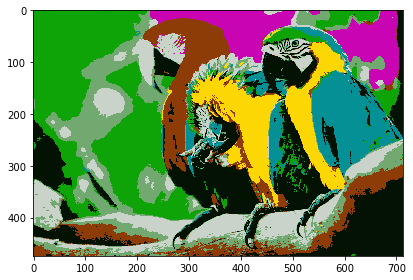

In [9]:
# Обратно в изображение
img_median = np.reshape(data_median, [474, 713, 3])
print(img_median.shape)
sio.imshow(img_median)

(474, 713, 3)


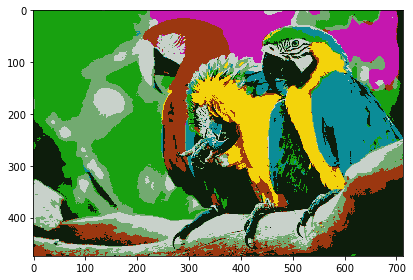

In [10]:
img_mean = np.reshape(data_mean, [474, 713, 3])
print(img_mean.shape)
sio.imshow(img_mean)

In [11]:
print('PSNR on median', peak_signal_noise_ratio(img, img_median))
print('PSNR on mean', peak_signal_noise_ratio(img, img_mean))

PSNR on median 18.175411416257003
PSNR on mean 18.46814574152363


In [13]:
# А теперь подбираем количество кластеров
for k in np.arange(6, 21):
    kmeans = KMeans(n_clusters=k, random_state=241)
    kmeans.fit(data)
    predicts = kmeans.predict(data)
    # Кластеры
    clusters = np.unique(predicts)
    # Заменяем в каждом кластере медианой
    data_median = np.copy(data)
    for n_cluster in clusters:
        curr_index = np.arange(0,data.shape[0])[predicts == n_cluster]
        data_median[curr_index,0] = np.median(data[curr_index,0])
        data_median[curr_index,1] = np.median(data[curr_index,1])
        data_median[curr_index,2] = np.median(data[curr_index,2])
    # Заменяем в каждом кластере средним
    data_mean = np.copy(data)
    for n_cluster in clusters:
        curr_index = np.arange(0,data.shape[0])[predicts == n_cluster]
        data_mean[curr_index,0] = np.mean(data[curr_index,0])
        data_mean[curr_index,1] = np.mean(data[curr_index,1])
        data_mean[curr_index,2] = np.mean(data[curr_index,2])
    # Обратно в изображение
    img_median = np.reshape(data_median, [474, 713, 3])
    img_mean = np.reshape(data_mean, [474, 713, 3])
    print('k',k)
    print('PSNR on median',  peak_signal_noise_ratio(img, img_median))
    print('PSNR on mean',  peak_signal_noise_ratio(img, img_mean))

k 6
PSNR on median 16.073164350227508
PSNR on mean 16.572716888656124
k 7
PSNR on median 17.372372398670677
PSNR on mean 17.67191545504412
k 8
PSNR on median 18.175411416257003
PSNR on mean 18.46814574152363
k 9
PSNR on median 18.850775771261343
PSNR on mean 19.1448535801965
k 10
PSNR on median 19.44607743096483
PSNR on mean 19.67480580827776
k 11
PSNR on median 19.88454204112774
PSNR on mean 20.16327623478707
k 12
PSNR on median 20.342566020603194
PSNR on mean 20.63353334502683


KeyboardInterrupt: 